## <center><font color = "Cyan"> Optimizing and Forecasting Supply Chain Performance </font></center>
* This project focuses on analyzing and optimizing supply chain management and performance using Python Pandas and other relevant libraries. 
* I will work on improving supply chain efficiency and forecasting future trends.
* Additionally, I will create visual insights to better understand the effectiveness of supply chain operations. 
* A sample dataset from Hugging Face will be used for this project. 
* This project will include data importing, data exploration, data cleaning, data visualization and data forecasting.

### <font color = "Cyan">Data Importing</font>
Step 01: Import <b>Pandas library</b>. <br>
Step 02: Read data from Hugging Face Datasets. Keep in mind that to load data from it, the path needs to start with "hf://".

In [50]:
import pandas as pd
df = pd.read_csv("hf://datasets/alalfi/SupplyChainDataset/DataCoSupplyChainDataset1.csv")

### <font color = "Cyan">Data Exploration</font>
The dataset I am currently using contains 180K records and 53 columns. Although there are multiple columns, not all of them are necessary for this analysis. I will focus only on the columns related to shipping, orders and product data.

In [51]:
df.head(5)

,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Id,Category_Name,Customer_City,...,Order_Zipcode,Product_Card_Id,Product_Category_Id,Product_Description,Product_Image,Product_Name,Product_Price,Product_Status,shipping_date_(DateOrders),Shipping_Mode
0,DEBIT,3,4,91.25000,314.64001,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018,Standard Class
1,TRANSFER,5,4,-249.09000,311.35999,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018,Standard Class
2,CASH,4,4,-247.78000,309.72000,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018,Standard Class
3,DEBIT,3,4,22.86000,304.81000,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018,Standard Class
4,PAYMENT,2,4,134.21001,298.25000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018,Standard Class


In [52]:
df.shape

(180519, 53)

In [53]:
df.columns

Index(['Type', 'Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)',
       'Benefit_per_order', 'Sales_per_customer', 'Delivery_Status',
       'Late_delivery_risk', 'Category_Id', 'Category_Name', 'Customer_City',
       'Customer_Country', 'Customer_Email', 'Customer_Fname', 'Customer_Id',
       'Customer_Lname', 'Customer_Password', 'Customer_Segment',
       'Customer_State', 'Customer_Street', 'Customer_Zipcode',
       'Department_Id', 'Department_Name', 'Latitude', 'Longitude', 'Market',
       'Order_City', 'Order_Country', 'Order_Customer_Id',
       'order_date_(DateOrders)', 'Order_Id', 'Order_Item_Cardprod_Id',
       'Order_Item_Discount', 'Order_Item_Discount_Rate', 'Order_Item_Id',
       'Order_Item_Product_Price', 'Order_Item_Profit_Ratio',
       'Order_Item_Quantity', 'Sales', 'Order_Item_Total',
       'Order_Profit_Per_Order', 'Order_Region', 'Order_State', 'Order_Status',
       'Order_Zipcode', 'Product_Card_Id', 'Product_Category_Id',
       'Product_De

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days_for_shipping_(real)       180519 non-null  int64  
 2   Days_for_shipment_(scheduled)  180519 non-null  int64  
 3   Benefit_per_order              180519 non-null  float64
 4   Sales_per_customer             180519 non-null  float64
 5   Delivery_Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category_Id                    180519 non-null  int64  
 8   Category_Name                  180519 non-null  object 
 9   Customer_City                  180519 non-null  object 
 10  Customer_Country               180519 non-null  object 
 11  Customer_Email                 180519 non-null  object 
 12  Customer_Fname                

### <font color = "Cyan">Data Cleaning</font>
Step 01: Check and handle null records<br>
Step 02: Check duplicates<br>
Step 03: Review data distribution<br>
Step 04: Convert date fields to datetime objects<br>
Step 05: Remove unnecessary columns and personally identifiable information (PII) (in this case, customer email address, password, etc.,)

In [55]:
null_cols = df.columns[df.isnull().any()]
df[null_cols].isnull().sum()

Customer_Lname              8
Customer_Zipcode            3
Order_Zipcode          155676
Product_Description    180519
dtype: int64

In [56]:
duplicates = df[df.duplicated()]
print(f"Total duplicate rows: {len(duplicates)}")

Total duplicate rows: 0


In [57]:
selected_cols = ['order_date_(DateOrders)', 'shipping_date_(DateOrders)', 'Shipping_Mode', 'Delivery_Status', 'Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)', 'Late_delivery_risk', 'Sales', 'Sales_per_customer', 'Order_Profit_Per_Order', 'Customer_Segment', 'Order_City', 'Order_Country', 'Order_Region', 'Order_State', 'Order_Status', 'Order_Item_Quantity', 'Order_Item_Discount', 'Order_Item_Discount_Rate', 'Product_Category_Id' , 'Product_Name', 'Product_Price']
refined_data = df[selected_cols]

In [58]:
refined_data = refined_data.rename(columns={
    'order_date_(DateOrders)': 'order_date',
    'shipping_date_(DateOrders)': 'shipping_date',
    'Shipping_Mode': 'shipping_mode',
    'Delivery_Status': 'delivery_status',
    'Days_for_shipping_(real)': 'shipping_days_actual',
    'Days_for_shipment_(scheduled)': 'shipping_days_scheduled',
    'Late_delivery_risk': 'late_delivery_risk',
    'Sales': 'sales_origin',
    'Sales_per_customer': 'sales_actual',
    'Order_Profit_Per_Order': 'profit_per_order',
    'Customer_Segment': 'customer_segment',
    'Order_City': 'order_city',
    'Order_Country': 'order_country',
    'Order_Region': 'order_region',
    'Order_State': 'order_state',
    'Order_Status': 'order_status',
    'Order_Item_Quantity': 'order_item_qty',
    'Order_Item_Discount': 'discount',
    'Order_Item_Discount_Rate': 'discount_rate',
    'Product_Category_Id': 'product_id',
    'Product_Name': 'product_name',
    'Product_Price': 'product_price'
})

I found that some columns contain null values. However, these columns are not important to this analysis, so I will exclude them. Additionally, there are no duplicate records. Then, I create a new DataFrame containing only the selected columns and rename them appropriately.

In [59]:
refined_data.describe(include='all')

,order_date,shipping_date,shipping_mode,delivery_status,shipping_days_actual,shipping_days_scheduled,late_delivery_risk,sales_origin,sales_actual,profit_per_order,...,order_country,order_region,order_state,order_status,order_item_qty,discount,discount_rate,product_id,product_name,product_price
count,180519,180519,180519,180519,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,...,180519,180519,180519,180519,180519.000000,180519.000000,180519.000000,180519.000000,180519,180519.000000
unique,1127,1131,4,4,NaN,NaN,NaN,NaN,NaN,NaN,...,164,23,1089,9,NaN,NaN,NaN,NaN,118,NaN
top,7/2/2017,9/27/2017,Standard Class,Late delivery,NaN,NaN,NaN,NaN,NaN,NaN,...,Estados Unidos,Central America,Inglaterra,COMPLETE,NaN,NaN,NaN,NaN,Perfect Fitness Perfect Rip Deck,NaN
freq,220,266,107752,98977,NaN,NaN,NaN,NaN,NaN,NaN,...,24840,28341,6722,59491,NaN,NaN,NaN,NaN,24515,NaN
mean,NaN,NaN,NaN,NaN,3.497654,2.931847,0.548291,203.772097,183.107609,21.974989,...,NaN,NaN,NaN,NaN,2.127638,20.664741,0.101668,31.851451,NaN,141.232547
std,NaN,NaN,NaN,NaN,1.623722,1.374449,0.497664,132.273077,120.043670,104.433526,...,NaN,NaN,NaN,NaN,1.453451,21.800901,0.070415,15.640064,NaN,139.732489
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,9.990000,7.490000,-4274.980000,...,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,2.000000,NaN,9.990000
25%,NaN,NaN,NaN,NaN,2.000000,2.000000,0.000000,119.980000,104.380000,7.000000,...,NaN,NaN,NaN,NaN,1.000000,5.400000,0.040000,18.000000,NaN,50.000000
50%,NaN,NaN,NaN,NaN,3.000000,4.000000,1.000000,199.920000,163.990010,31.520000,...,NaN,NaN,NaN,NaN,1.000000,14.000000,0.100000,29.000000,NaN,59.990000
75%,NaN,NaN,NaN,NaN,5.000000,4.000000,1.000000,299.950010,247.399990,64.800000,...,NaN,NaN,NaN,NaN,3.000000,29.990000,0.160000,45.000000,NaN,199.990000


In [60]:
refined_data['order_date'] = pd.to_datetime(refined_data['order_date'], errors = 'coerce')
refined_data['shipping_date'] = pd.to_datetime(refined_data['shipping_date'], errors = 'coerce')

### <font color = "Cyan">Supply Chain Performance Analysis</font>
Step 01: Identify the business questions. In this project, I want to know: <br>
* Which customer segment | region generates the most revenue?
* Which product item is most profitable (top 10)?
* How well the product sales is performing (top 10)?
* What are the monthly sales trends for the (3) most profitable regions?
* Which regions face most late deliveries?
* Which shipping mode has the highest delay risk?
* What impact does the product discount have on profit?
* Will a delivery be late?

Step 02: Import <b>DuckDB (optional), matplotlib and seaborn libraries</b>.<br>
Step 03: Prepare the required sub-dataset by writing an embedded query.

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
import duckdb
revenue_by_cust_seg = """
                         SELECT customer_segment,
                                SUM("order_item_qty")::INT AS order_item_qty,
                                AVG("discount_rate")::FLOAT AS avg_discount_rate,
                                SUM("sales_origin")::FLOAT AS sales_origin, 
                                SUM("sales_actual")::FLOAT AS sales_actual, 
                                SUM("profit_per_order")::FLOAT AS profit_per_order
                         FROM refined_data 
                         GROUP BY customer_segment
                      """
result_set01 = duckdb.query(revenue_by_cust_seg).df()
result_set01

,customer_segment,order_item_qty,avg_discount_rate,sales_origin,sales_actual,profit_per_order
0,Consumer,199234,0.101616,19095790.0,17164278.0,2.073488e+06
1,Home Office,68285,0.101851,6520538.0,5859474.0,6.908403e+05
2,Corporate,116560,0.101649,11168407.0,10030650.0,1.202575e+06


In [63]:
revenue_by_region = """
                        SELECT order_region,
                               SUM("sales_origin")::FLOAT AS sales_origin, 
                               SUM("sales_actual")::FLOAT AS sales_actual, 
                               SUM("profit_per_order")::FLOAT AS profit_per_order 
                        FROM refined_data 
                        GROUP BY order_region
                        ORDER BY sales_actual DESC
                    """
result_set02 = duckdb.query(revenue_by_region).df()
result_set02

,order_region,sales_origin,sales_actual,profit_per_order
0,Western Europe,5.894381e+06,5.296003e+06,625446.062500
1,Central America,5.665712e+06,5.093850e+06,616341.562500
2,South America,2.960882e+06,2.660244e+06,335154.406250
3,Northern Europe,2.155831e+06,1.939362e+06,233450.593750
4,Southern Europe,2.047919e+06,1.837526e+06,230829.234375
5,Oceania,2.016654e+06,1.809996e+06,201478.015625
6,Southeast Asia,1.932496e+06,1.738554e+06,211342.812500
7,Caribbean,1.651019e+06,1.481669e+06,171825.640625
8,West of USA,1.571416e+06,1.412254e+06,164940.656250
9,South Asia,1.553681e+06,1.397365e+06,165703.906250


In [64]:
top10_products = """
                    SELECT product_id,
                           product_name,
                           SUM("profit_per_order")::FLOAT AS profit_per_order
                    FROM refined_data 
                    GROUP BY product_id, product_name
                    ORDER BY profit_per_order DESC
                    LIMIT 10
                 """
result_set03 = duckdb.query(top10_products).df()

def product_nickname(result_df):
    nickname = " ".join(result_df["product_name"].split()[:2])
    return f"{nickname} ({result_df['product_id']})"

result_set03["product_nickname"] = result_set03.apply(product_nickname, axis = 1)
result_set03

,product_id,product_name,profit_per_order,product_nickname
0,45,Field & Stream Sportsman 16 Gun Fire Safe,756220.750000,Field & (45)
1,17,Perfect Fitness Perfect Rip Deck,493828.312500,Perfect Fitness (17)
2,43,Diamondback Women's Serene Classic Comfort Bi,427455.562500,Diamondback Women's (43)
3,9,Nike Men's Free 5.0+ Running Shoe,379915.812500,Nike Men's (9)
4,24,Nike Men's Dri-FIT Victory Golf Polo,350421.031250,Nike Men's (24)
5,48,Pelican Sunstream 100 Kayak,324076.375000,Pelican Sunstream (48)
6,46,O'Brien Men's Neoprene Life Vest,318451.437500,O'Brien Men's (46)
7,18,Nike Men's CJ Elite 2 TD Football Cleat,311902.812500,Nike Men's (18)
8,29,Under Armour Girls' Toddler Spine Surge Runni,126278.507812,Under Armour (29)
9,64,Dell Laptop,69656.812500,Dell Laptop (64)


Text(0.5, 1.0, 'Total Revenue by Customer Segment')

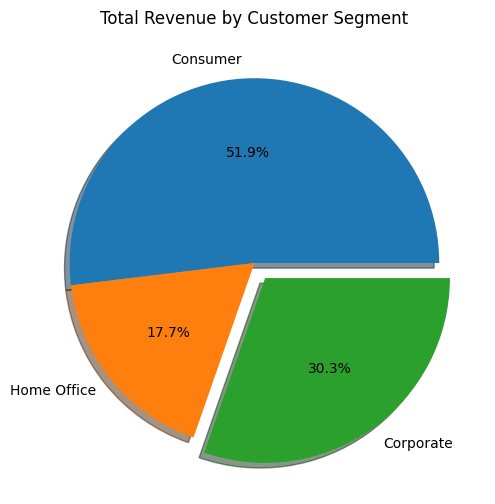

In [65]:
plt.subplots(figsize=(16,6))
explode = [0, 0, 0.1]
plt.pie(x = result_set01['sales_actual'], labels = result_set01['customer_segment'], explode = explode, shadow = True, autopct = '%1.1f%%')
plt.title("Total Revenue by Customer Segment")

Text(0, 0.5, 'Actual Sales')

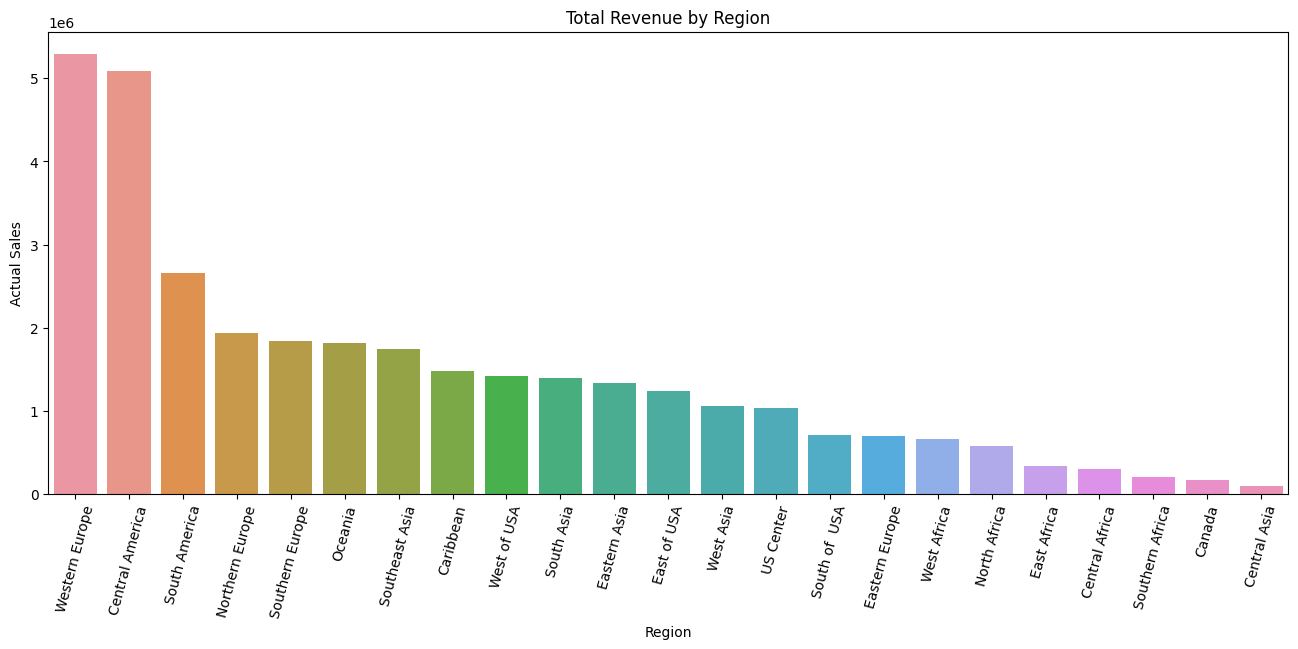

In [66]:
plt.subplots(figsize=(16,6))
sns.barplot(data = result_set02, x = "order_region", y = "sales_actual")
plt.title("Total Revenue by Region")
plt.xticks(rotation = 75)
plt.xlabel("Region")
plt.ylabel("Actual Sales")

Text(0, 0.5, 'Profit')

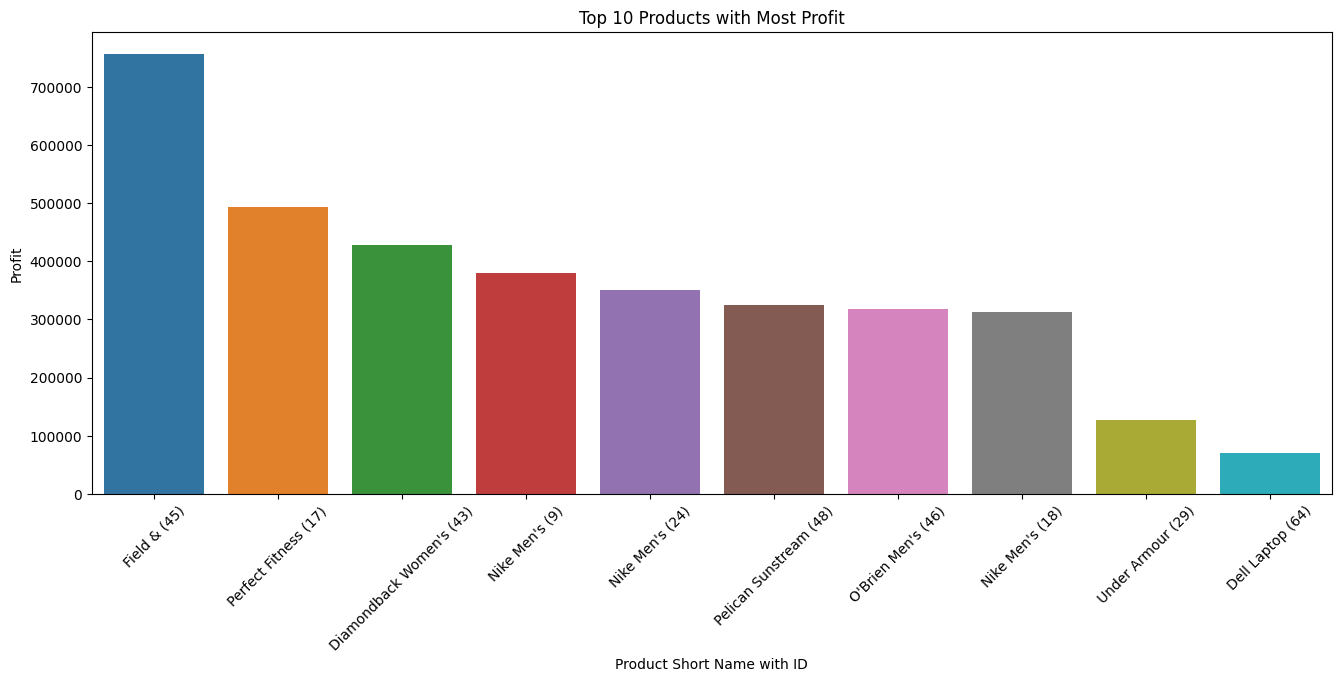

In [67]:
plt.subplots(figsize=(16,6))
sns.barplot(data = result_set03, x = "product_nickname", y = "profit_per_order")
plt.title("Top 10 Products with Most Profit")
plt.xticks(rotation = 45)
plt.xlabel("Product Short Name with ID")
plt.ylabel("Profit")

In [68]:
product_performance = refined_data.groupby(['product_name', 'product_id']).agg({'sales_actual': 'sum'}).reset_index()
product_performance = product_performance.sort_values("sales_actual", ascending = False)
product_performance = product_performance.head(10)
product_performance['sales_cum'] = product_performance['sales_actual'].cumsum()
product_performance['sales_cum_cent'] = 100 * product_performance['sales_cum'] / product_performance['sales_actual'].sum()

product_performance["product_nickname"] = product_performance.apply(product_nickname, axis = 1)
product_performance

,product_name,product_id,sales_actual,sales_cum,sales_cum_cent,product_nickname
24,Field & Stream Sportsman 16 Gun Fire Safe,45,6.226935e+06,6.226935e+06,20.936552,Field & (45)
71,Perfect Fitness Perfect Rip Deck,17,3.973180e+06,1.020012e+07,34.295402,Perfect Fitness (17)
21,Diamondback Women's Serene Classic Comfort Bi,43,3.700784e+06,1.390090e+07,46.738384,Diamondback Women's (43)
61,Nike Men's Free 5.0+ Running Shoe,9,3.295693e+06,1.719659e+07,57.819350,Nike Men's (9)
59,Nike Men's Dri-FIT Victory Golf Polo,24,2.828708e+06,2.002530e+07,67.330192,Nike Men's (24)
70,Pelican Sunstream 100 Kayak,48,2.785518e+06,2.281082e+07,76.695818,Pelican Sunstream (48)
56,Nike Men's CJ Elite 2 TD Football Cleat,18,2.598494e+06,2.540931e+07,85.432622,Nike Men's (18)
67,O'Brien Men's Neoprene Life Vest,46,2.596454e+06,2.800577e+07,94.162565,O'Brien Men's (46)
102,Under Armour Girls' Toddler Spine Surge Runni,29,1.140771e+06,2.914654e+07,97.998129,Under Armour (29)
18,Dell Laptop,64,5.953950e+05,2.974193e+07,100.000000,Dell Laptop (64)


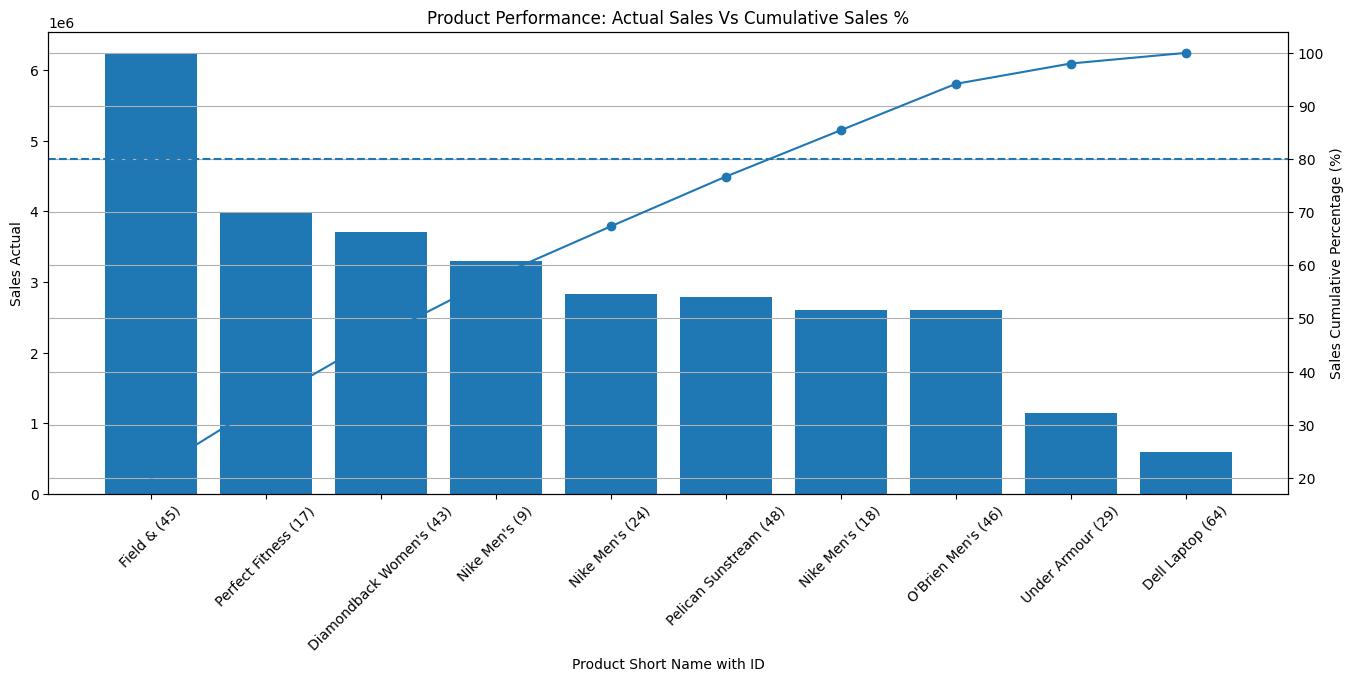

In [69]:
fig, ax1 = plt.subplots(figsize=(16,6))

ax1.bar(product_performance['product_nickname'], product_performance['sales_actual'])
ax1.set_xlabel("Product Short Name with ID")
ax1.set_ylabel("Sales Actual")
ax1.tick_params(axis = 'x', rotation = 45)

ax2 = ax1.twinx()
ax2.plot(product_performance['product_nickname'], product_performance['sales_cum_cent'], marker = 'o')
ax2.set_ylabel("Sales Cumulative Percentage (%)")
ax2.axhline(80, linestyle = '--')

plt.title("Product Performance: Actual Sales Vs Cumulative Sales %")
plt.grid(axis='y')

In [70]:
refined_data['yyyy_mm'] = refined_data["order_date"].dt.to_period("M").astype(str)

In [71]:
region_monthly_sales = refined_data.groupby(["yyyy_mm", "order_region"])["sales_actual"].sum().reset_index()
top3_regions = region_monthly_sales.groupby("order_region")["sales_actual"].sum().nlargest(3).index
region_monthly_sales = region_monthly_sales[region_monthly_sales["order_region"].isin(top3_regions)]
region_monthly_sales.head(3)

,yyyy_mm,order_region,sales_actual
1,2015-01,Central America,496540.24705
2,2015-01,South America,299234.19429
4,2015-02,Central America,446994.60650


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packa

Text(0, 0.5, 'Sales Actual')

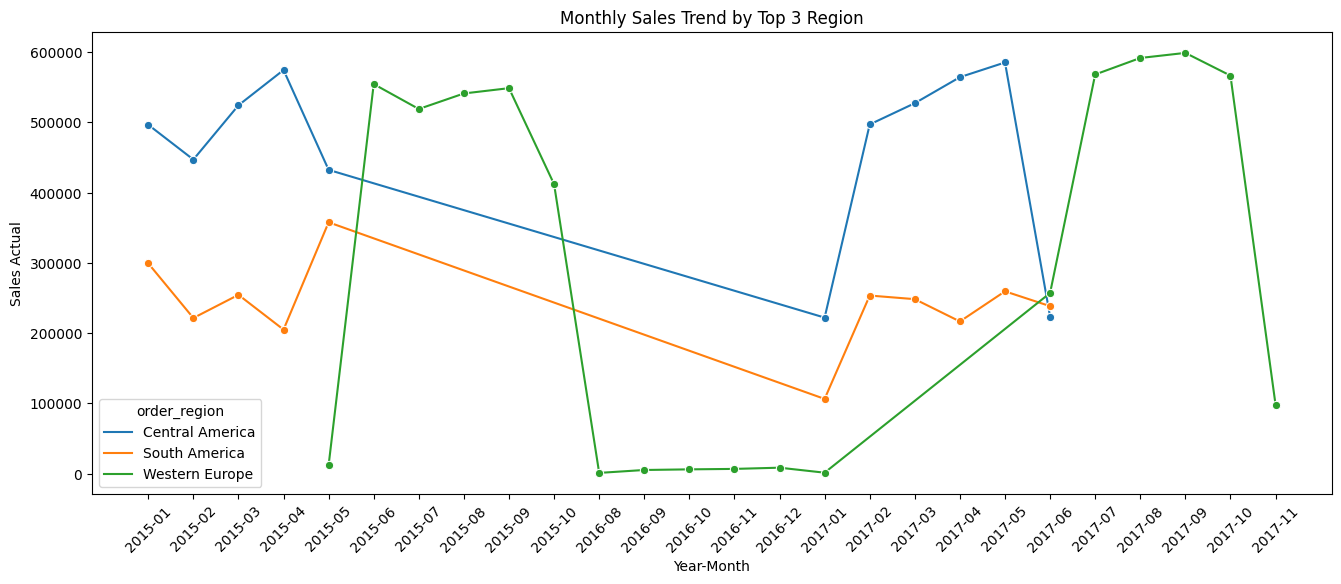

In [72]:
plt.figure(figsize = (16, 6))
sns.lineplot(data = region_monthly_sales, x = "yyyy_mm", y = "sales_actual", hue = "order_region", marker = "o")
plt.title("Monthly Sales Trend by Top 3 Region")
plt.xticks(rotation = 45)
plt.xlabel("Year-Month")
plt.ylabel("Sales Actual")

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Actual Shipping Days')

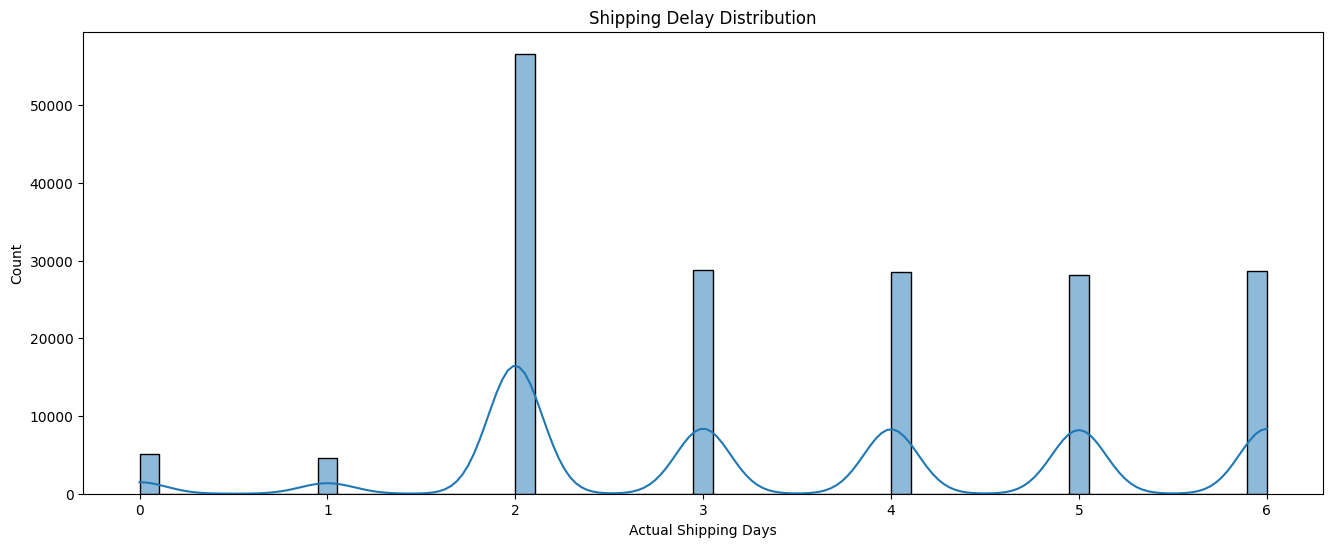

In [73]:
plt.figure(figsize = (16, 6))
sns.histplot(refined_data['shipping_days_actual'], kde = True)
plt.title("Shipping Delay Distribution")
plt.xlabel("Actual Shipping Days")

In [74]:
delay_by_region = """
                        SELECT order_region,
                               AVG("shipping_days_actual")::INT AS avg_shipping_days,
                               SUM("sales_actual")::FLOAT AS sales_actual, 
                               SUM("profit_per_order")::FLOAT AS profit_per_order 
                        FROM refined_data 
                        GROUP BY order_region
                        ORDER BY avg_shipping_days, sales_actual, profit_per_order DESC
                    """
result_set04 = duckdb.query(delay_by_region).df()
result_set04

,order_region,avg_shipping_days,sales_actual,profit_per_order
0,Central Asia,3,9.795369e+04,13045.280273
1,Canada,3,1.682574e+05,23900.710938
2,Southern Africa,3,2.043025e+05,30826.050781
3,North Africa,3,5.722419e+05,64599.859375
4,South of USA,3,7.069043e+05,88114.882812
5,US Center,3,1.034129e+06,131094.234375
6,West Asia,3,1.056081e+06,118815.406250
7,Southeast Asia,3,1.738554e+06,211342.812500
8,Oceania,3,1.809996e+06,201478.015625
9,Southern Europe,3,1.837526e+06,230829.234375


Text(0, 0.5, 'Average Shipping Days')

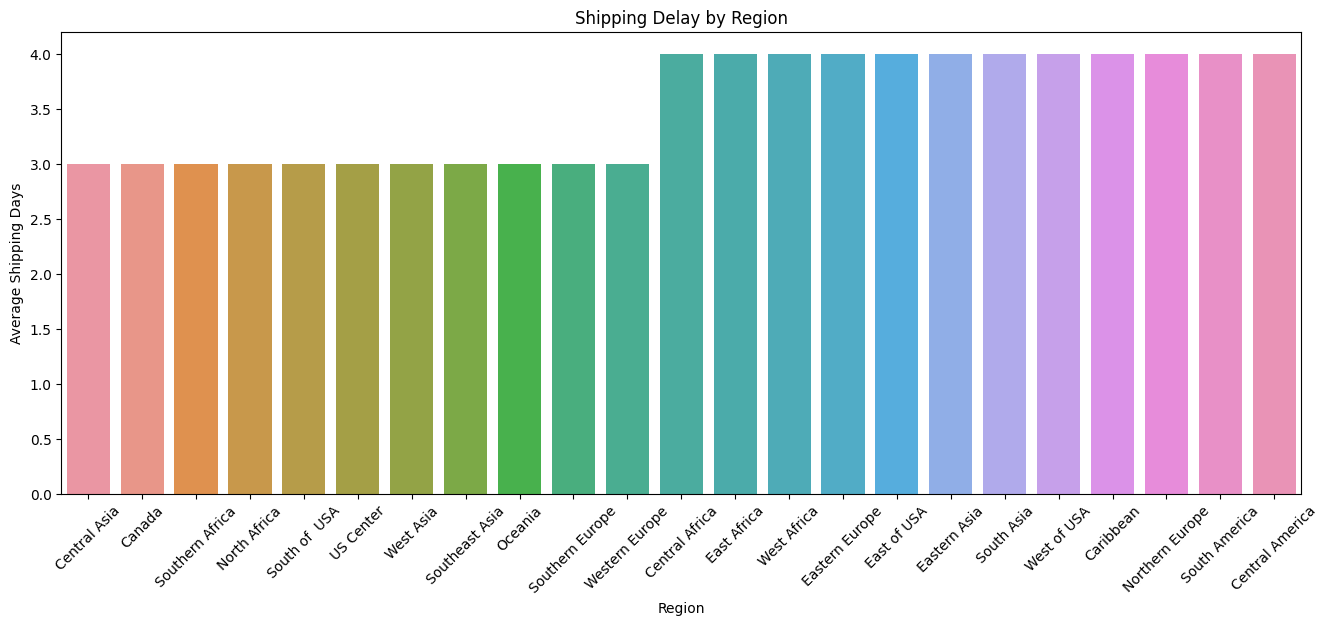

In [75]:
plt.subplots(figsize=(16,6))
sns.barplot(data = result_set04, x = "order_region", y = "avg_shipping_days")
plt.title("Shipping Delay by Region")
plt.xticks(rotation = 45)
plt.xlabel("Region")
plt.ylabel("Average Shipping Days")

Text(0, 0.5, 'Region')

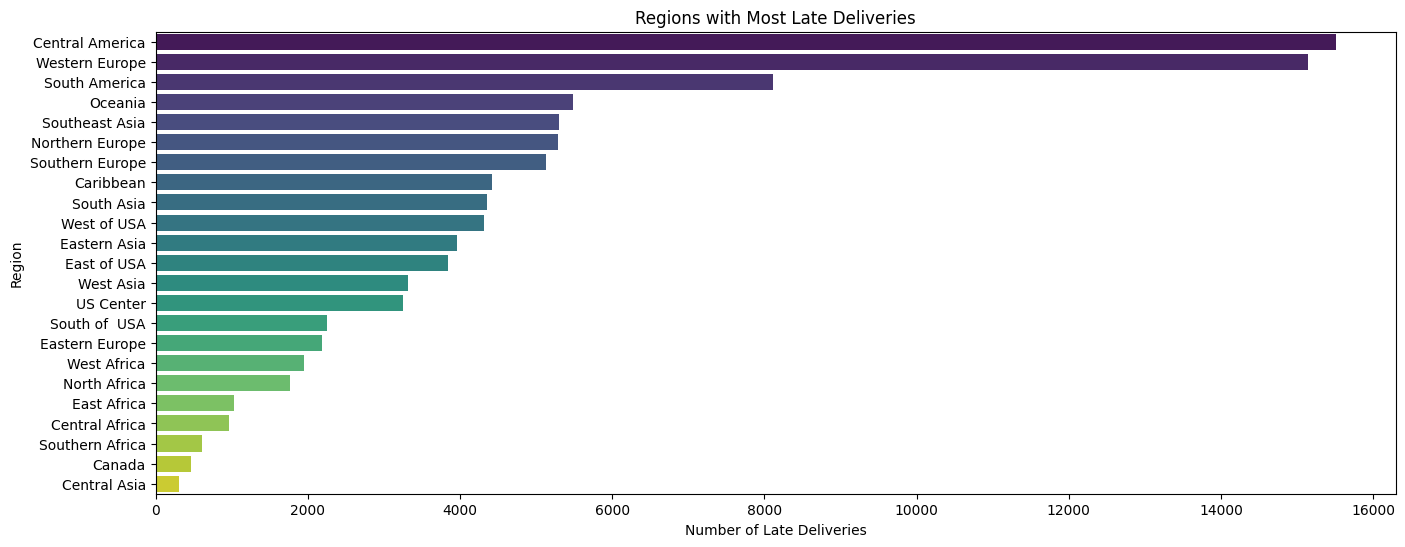

In [76]:
late_deliveries = refined_data[refined_data['late_delivery_risk'] == 1]
late_by_region = late_deliveries.groupby('order_region').size().reset_index(name='late_delivery_count')
late_by_region = late_by_region.sort_values('late_delivery_count', ascending=False)


plt.figure(figsize=(16,6))
sns.barplot(x='late_delivery_count', y='order_region', data=late_by_region, palette='viridis')
plt.title('Regions with Most Late Deliveries')
plt.xlabel('Number of Late Deliveries')
plt.ylabel('Region')

In [77]:
late_delivery_risk_vs_profit = """
                        SELECT late_delivery_risk,
                               SUM("sales_actual")::FLOAT AS sales_actual, 
                               SUM("profit_per_order")::FLOAT AS profit_per_order 
                        FROM refined_data 
                        GROUP BY late_delivery_risk
                        ORDER BY profit_per_order DESC
                    """
result_set05 = duckdb.query(late_delivery_risk_vs_profit).df()
result_set05

,late_delivery_risk,sales_actual,profit_per_order
0,1,18082556.0,2140051.75
1,0,14971847.0,1826851.25


Text(0, 0.5, 'Shipping Mode')

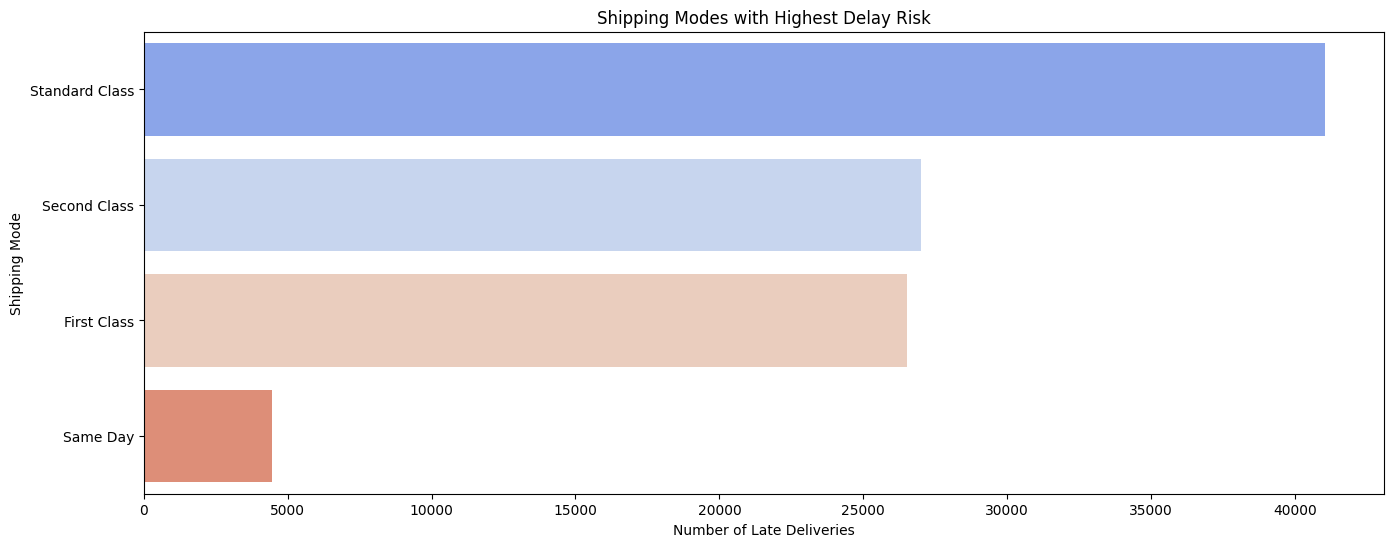

In [78]:
late_by_shipping = late_deliveries.groupby('shipping_mode').size().reset_index(name='late_delivery_count')
late_by_shipping = late_by_shipping.sort_values('late_delivery_count', ascending=False)

plt.figure(figsize=(16,6))
sns.barplot(x='late_delivery_count', y='shipping_mode', data=late_by_shipping, palette='coolwarm')
plt.title('Shipping Modes with Highest Delay Risk')
plt.xlabel('Number of Late Deliveries')
plt.ylabel('Shipping Mode')

Text(0, 0.5, 'Profit')

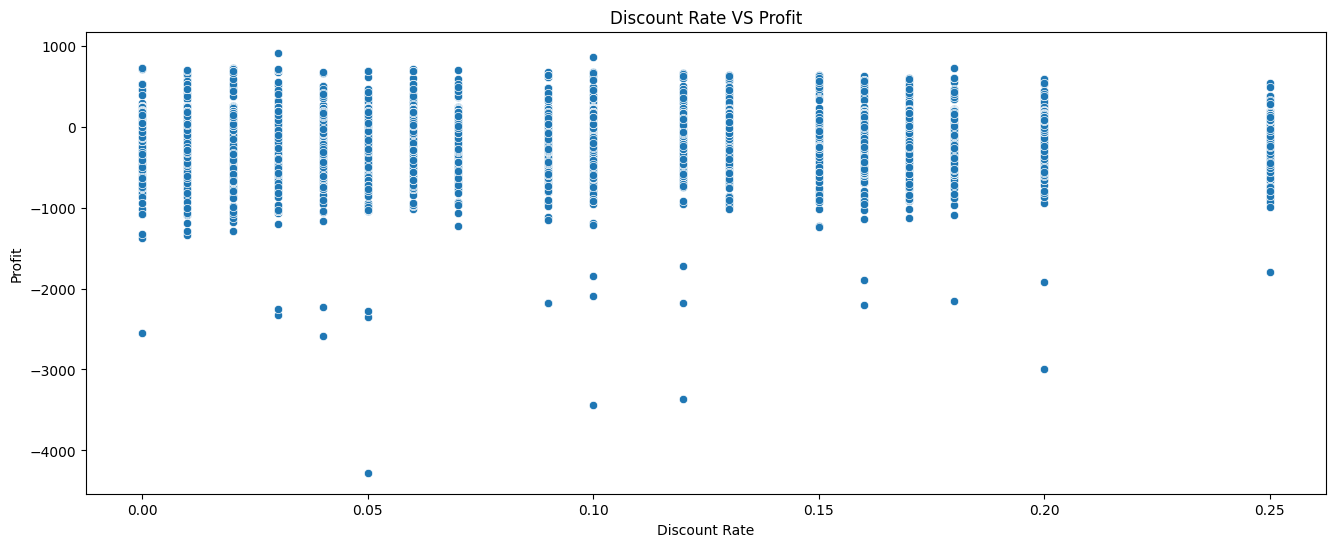

In [79]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='discount_rate', y='profit_per_order', data=refined_data)
plt.title("Discount Rate VS Profit")
plt.xlabel("Discount Rate")
plt.ylabel("Profit")

Based on the scatter plot between Discount Rate and Profit, there is no strong relationship between them. The Discount Rate does not affect Profit overall.

### <font color = "Cyan">Forecasting Late Delivery Risk</font>
Step 01: Select the important features. <br>
Step 02: Identify the target (in this case, late delivery risk). <br>
Step 03: Add some important features. (optional) <br>
Step 04: If necessary, encode the categorical variables. <br>
Step 05: Split the dataset into train and test sets. <br>
Step 06: Train <b>Random Forest Classifier</b>. <small><b>Other models may also be considered.</b></small> <br>
Step 07: Evaluate with classification metrics.

In [80]:
refined_data['order_year'] = refined_data['order_date'].dt.year
refined_data['order_month'] = refined_data['order_date'].dt.month
refined_data['order_daysofweek'] = refined_data['order_date'].dt.dayofweek
selected_features = ['order_year', 'order_month', 'order_daysofweek' , 'shipping_mode', 'shipping_days_actual', 'shipping_days_scheduled', 'order_region', 'order_item_qty', 'profit_per_order', 'sales_actual']
final_data = refined_data[selected_features]
final_data.tail(3)

,order_year,order_month,order_daysofweek,shipping_mode,shipping_days_actual,shipping_days_scheduled,order_region,order_item_qty,profit_per_order,sales_actual
180516,2016,1,4,Standard Class,5,4,Oceania,1,141.11,391.98001
180517,2016,1,4,Standard Class,3,4,Oceania,1,186.23,387.98001
180518,2016,1,4,Standard Class,4,4,South Asia,1,168.95,383.98001


In [81]:
txn_late_delivery = refined_data.groupby(['late_delivery_risk']).size().reset_index(name="late_txn")
txn_late_delivery
#late-delivery (1)

,late_delivery_risk,late_txn
0,0,81542
1,1,98977


In [82]:
selected_target = refined_data['late_delivery_risk']

In [83]:
final_data = pd.get_dummies(final_data[selected_features], drop_first=True)
final_data.head()

,order_year,order_month,order_daysofweek,shipping_days_actual,shipping_days_scheduled,order_item_qty,profit_per_order,sales_actual,shipping_mode_Same Day,shipping_mode_Second Class,...,order_region_South Asia,order_region_South of USA,order_region_Southeast Asia,order_region_Southern Africa,order_region_Southern Europe,order_region_US Center,order_region_West Africa,order_region_West Asia,order_region_West of USA,order_region_Western Europe
0,2018,1,2,3,4,1,91.25,314.64001,False,False,...,False,False,True,False,False,False,False,False,False,False
1,2018,1,5,5,4,1,-249.09,311.35999,False,False,...,True,False,False,False,False,False,False,False,False,False
2,2018,1,5,4,4,1,-247.78,309.72000,False,False,...,True,False,False,False,False,False,False,False,False,False
3,2018,1,5,3,4,1,22.86,304.81000,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2018,1,5,2,4,1,134.21,298.25000,False,False,...,False,False,False,False,False,False,False,False,False,False


In [84]:
from sklearn.model_selection import train_test_split
X = final_data
y = selected_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [85]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [86]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     16307
           1       0.96      1.00      0.98     19797

    accuracy                           0.97     36104
   macro avg       0.98      0.97      0.97     36104
weighted avg       0.98      0.97      0.97     36104

Accuracy:  0.9742964768446709


Text(170.72222222222223, 0.5, 'Actual')

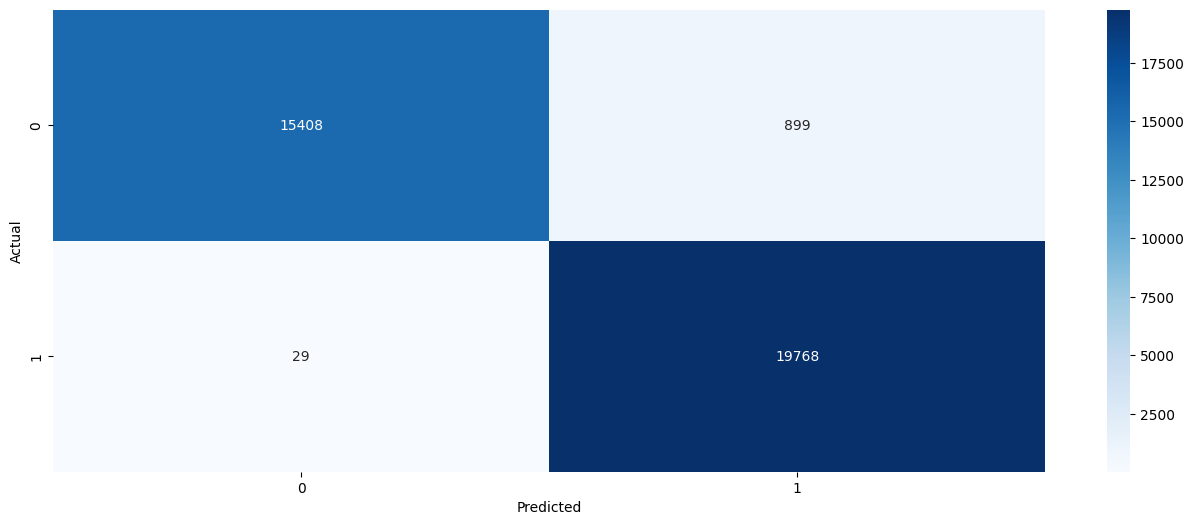

In [87]:
plt.figure(figsize=(16,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd', cmap= 'Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")

Using a <b>Random Forest Classifier</b> trained on order information and shipping attributes, the accuracy is 97.4% which means the prediction shows that <b><font color ="Red">a delivery is likely to be late</font></b>.
<br><br>
The organization needs to prepare the following actions:
* Identify at-risk orders before they are shipped.
* Improve Shipping Vendor performance.
* Track shipping operations.
* Enhance customer communication by offering expected delay timeline, upgraded shipping mode or methods, and so on.